In [1]:
from MLSD import *

In [2]:
import scipy.io as sio
import pandas as pd
import platform

growth_filepath = 'Dataset/growth.mat'
growth_data_dict = sio.loadmat(growth_filepath) # this is of type dict

print(growth_data_dict['hgtmmat'].shape)
print(growth_data_dict['hgtfmat'].shape)
print(growth_data_dict['age'].shape)
print()
print(sorted(growth_data_dict.keys()))

ages_arr = growth_data_dict['age']

boys_df = pd.DataFrame(growth_data_dict['hgtmmat'])
boys_df['age'] = ages_arr
boys_df = pd.melt(boys_df, id_vars=['age'])
boys_df.rename(columns={'variable' : 'cohort_id', 'value' : 'height'}, inplace=True)
boys_df['gender'] = 'boy'
#boys_df

girls_df = pd.DataFrame(growth_data_dict['hgtfmat'])
girls_df['age'] = ages_arr
girls_df = pd.melt(girls_df, id_vars=['age'])
girls_df.rename(columns={'variable' : 'cohort_id', 'value' : 'height'}, inplace=True)
girls_df['gender'] = 'girl'
#girls_df

growth_data_df = pd.concat([boys_df, girls_df])

(31, 39)
(31, 54)
(31, 1)

['D2hgtfmat12', 'Dhgtffd', 'Dhgtfmat', 'Dhgtfmeanfd', 'Dhgtfmeanvec', 'Dhgtfregfd', 'Dhgtfregmat', 'Dhgtfvec', 'Lfdobj', 'PGSctr', 'PGSctrmean', 'SSE', 'Wfd', 'Wfd0', 'WfdCR', 'WfdLM', 'WfdPar', 'WfdParLM', 'WfdParf', 'WfdParm', 'Wfdf', 'Wfdm', '__globals__', '__header__', '__version__', 'accelfdCR', 'accelfdLM', 'accelfdUN', 'accelmatCR', 'accelmatLM', 'accelmatUN', 'accelmeanfdLM', 'accffd', 'accfmatfine', 'accfmeanfine', 'accmat', 'accmn', 'accveci', 'adn', 'adnj', 'age', 'agefine', 'agej', 'ageval', 'ans', 'aup', 'aupj', 'basisw', 'beta', 'betaf', 'betam', 'coef', 'coef0', 'df', 'dfi', 'dfsave', 'fid', 'gcv', 'gcvi', 'gcvsave', 'growth', 'hgtbasis', 'hgtbasis12', 'hgtfdPar', 'hgtfdPari', 'hgtfdi', 'hgtfdpar', 'hgtffd', 'hgtffd12', 'hgtffit', 'hgtfhatfd', 'hgtfmat', 'hgtfmatfine', 'hgtfres', 'hgtfresmnsqr', 'hgtfstd', 'hgtfvar', 'hgtmfd', 'hgtmfit', 'hgtmhatfd', 'hgtmmat', 'hgtmres', 'hgtmresmnsqr', 'hgtmstd', 'hgtmvar', 'i', 'icase', 'index', 'indx', 'ind

In [3]:
data = growth_data_df.groupby(['cohort_id','gender'])['height'].apply(list)
age = growth_data_df.groupby(['cohort_id','gender'])['age'].apply(list)
gender_x = growth_data_df.groupby(['cohort_id','gender'])['gender'].apply(list)
gender = []

for i in gender_x:
    gender.append(np.unique(i)[0])

In [4]:
height = SData(x= np.asarray(data), dtype='Series')
age = SData(x= np.asarray(age), dtype='Series')
len(height)

93

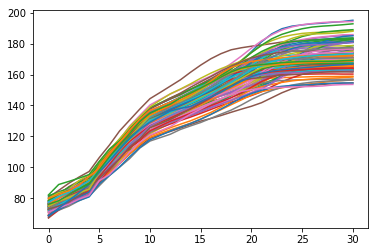

In [5]:
height.plot()

In [6]:
height.extracted_features.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,81.3,195.1,148.987097,38.157650,-0.395776,-1.160091,153.4,3.793333,2.555378,0.4,...,9.7,0.633298,-0.521547,-0.072414,1.874124,-5.3,-1.000000e-01,7.2,1.220537,7.067003
1,76.2,158.9,132.761290,28.020150,-0.766576,-0.867915,142.4,2.756667,2.384349,0.0,...,8.3,0.702714,-0.400481,-0.141379,1.341774,-2.0,-3.000000e-01,6.3,3.702938,15.505676
2,76.2,178.7,135.700000,30.888572,-0.499545,-0.868678,142.2,3.416667,2.074622,1.3,...,9.4,1.380038,0.921149,-0.100000,1.550528,-2.2,-2.000000e-01,7.2,3.437560,14.162635
3,74.6,166.1,134.987097,30.427341,-0.665556,-0.958074,143.4,3.046667,2.150772,-0.1,...,7.2,0.348771,-0.680805,-0.117241,0.989625,-2.6,-2.842171e-14,2.3,-0.065743,0.741203
4,76.8,171.5,132.525806,30.698019,-0.377716,-1.102338,135.8,3.156667,1.872019,0.3,...,7.5,0.601827,-0.378104,-0.093103,1.361017,-2.9,0.000000e+00,5.5,1.862987,7.896002


In [7]:
from MLSD import *
from sklearn.svm import SVC
height = SData(np.asarray(height), dtype='Series',
                    column = 'HeightCurve')

model = SVC()
model.fit(height.extracted_features, gender)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
ac= activeTrans(ifSData = True)
ac.fit_transform(height).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,81.3,195.1,148.987097,38.157650,-0.395776,-1.160091,153.4,3.793333,2.555378,0.4,...,9.7,0.633298,-0.521547,-0.072414,1.874124,-5.3,-1.000000e-01,7.2,1.220537,7.067003
1,76.2,158.9,132.761290,28.020150,-0.766576,-0.867915,142.4,2.756667,2.384349,0.0,...,8.3,0.702714,-0.400481,-0.141379,1.341774,-2.0,-3.000000e-01,6.3,3.702938,15.505676
2,76.2,178.7,135.700000,30.888572,-0.499545,-0.868678,142.2,3.416667,2.074622,1.3,...,9.4,1.380038,0.921149,-0.100000,1.550528,-2.2,-2.000000e-01,7.2,3.437560,14.162635
3,74.6,166.1,134.987097,30.427341,-0.665556,-0.958074,143.4,3.046667,2.150772,-0.1,...,7.2,0.348771,-0.680805,-0.117241,0.989625,-2.6,-2.842171e-14,2.3,-0.065743,0.741203
4,76.8,171.5,132.525806,30.698019,-0.377716,-1.102338,135.8,3.156667,1.872019,0.3,...,7.5,0.601827,-0.378104,-0.093103,1.361017,-2.9,0.000000e+00,5.5,1.862987,7.896002


In [9]:
from sklearn.pipeline import Pipeline
basic_trans = activeTrans(ifSData=True)
clf = SVC(kernel='linear')
s_svm = Pipeline([('bt', basic_trans), ('svc', clf)])
s_svm.fit(X=height,y=gender)

Pipeline(steps=[('bt', <MLSD.Transformers.activeTrans.activeTrans object at 0x112dcbf98>), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [10]:
height = SData(x= np.asarray(data), dtype='Series')
height.transformer= tsfreshSeries()
height.extracted_features.head()

Using tsfresh as backend


Feature Extraction: 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]


,X__variance_larger_than_standard_deviation,X__has_duplicate_max,X__has_duplicate_min,X__has_duplicate,X__sum_values,X__mean_autocorrelation,X__augmented_dickey_fuller,X__abs_energy,X__mean_abs_change,X__mean_change,...,"X__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","X__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","X__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","X__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","X__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""stderr""","X__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","X__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","X__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr"""
id,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,0.0,0.0,0.0,4618.6,1.803394,-1.196801,733248.00,3.793333,3.793333,...,18.624286,22.08,37.81,31.875,2.557673,1.805801,2.113027,6.062161,5.808675,7.225190
1.0,1.0,0.0,0.0,1.0,4115.6,1.760652,-1.855658,570731.36,2.756667,2.756667,...,12.516429,11.39,27.69,20.455,2.629553,2.348082,2.430184,5.471079,7.672985,7.046319
2.0,1.0,0.0,0.0,0.0,4206.7,1.724707,-0.925727,600426.41,3.416667,3.416667,...,15.492857,18.87,32.90,26.942,1.884588,1.532478,1.563900,4.247387,5.017569,4.775072
3.0,1.0,0.0,0.0,1.0,4184.6,1.773355,-0.176763,593567.52,3.053333,3.046667,...,14.024286,13.96,30.55,23.318,2.455975,2.258462,2.300723,5.437757,7.449262,7.068405
4.0,1.0,0.0,0.0,0.0,4108.3,1.786063,-3.338411,573669.19,3.156667,3.156667,...,15.171429,18.31,31.09,26.098,1.935387,1.345452,1.531068,4.639041,4.310302,5.361323


In [11]:
height1 = SData(x= np.asarray(data), dtype='Series')
height2 = SData(x= np.asarray(data), dtype='Series', transformer= tsfreshSeries())
Mydata = SDataFrame([height1,height2],columns=['height1','height2'])
Mydata.extracted_features.head()

Using tsfresh as backend


Feature Extraction: 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]


,0,1,2,3,4,5,6,7,8,9,...,"X__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""1","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""1","X__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""1","X__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""1","X__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""1","X__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""stderr""1","X__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""1","X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""1","X__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""1","X__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""1"
0,81.3,195.1,148.987097,38.157650,-0.395776,-1.160091,153.4,3.793333,2.555378,0.4,...,18.624286,22.08,37.81,31.875,2.557673,1.805801,2.113027,6.062161,5.808675,7.225190
1,76.2,158.9,132.761290,28.020150,-0.766576,-0.867915,142.4,2.756667,2.384349,0.0,...,12.516429,11.39,27.69,20.455,2.629553,2.348082,2.430184,5.471079,7.672985,7.046319
2,76.2,178.7,135.700000,30.888572,-0.499545,-0.868678,142.2,3.416667,2.074622,1.3,...,15.492857,18.87,32.90,26.942,1.884588,1.532478,1.563900,4.247387,5.017569,4.775072
3,74.6,166.1,134.987097,30.427341,-0.665556,-0.958074,143.4,3.046667,2.150772,-0.1,...,14.024286,13.96,30.55,23.318,2.455975,2.258462,2.300723,5.437757,7.449262,7.068405
4,76.8,171.5,132.525806,30.698019,-0.377716,-1.102338,135.8,3.156667,1.872019,0.3,...,15.171429,18.31,31.09,26.098,1.935387,1.345452,1.531068,4.639041,4.310302,5.361323


In [12]:
from sklearn.pipeline import Pipeline
basic_trans = activeTrans(ifSData=False)
clf = SVC(kernel='linear')
s_svm = Pipeline([('bt', basic_trans), ('svc', clf)])
s_svm.fit(X=Mydata,y=gender)

Pipeline(steps=[('bt', <MLSD.Transformers.activeTrans.activeTrans object at 0x103ad3fd0>), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [48]:
from sklearn.metrics import log_loss, classification_report,roc_auc_score,roc_curve, hinge_loss

In [61]:
height = SData(x= np.asarray(data), dtype='Series')
X_train,y_train, X_test,y_test = height.split_train_test(np.asarray(gender),test_ratio=0.5)

In [62]:
basic_trans = activeTrans(ifSData=True)
clf = SVC(kernel='linear',probability=True)
s_svm = Pipeline([('bt', basic_trans), ('svc', clf)])
s_svm.fit(X_train,y_train)
prediction = s_svm.predict(X_test)
prob = s_svm.predict_proba(X_test)[:,0]

In [63]:
Test = []

for i in prediction:
    if i == 'girl':
        Test.append(0)
    else:
        Test.append(1)


roc_auc_score(y_score=prob, y_true=Test)

1.0

In [64]:
log_loss(y_pred=prob, y_true=y_test)

3.6747538146523202

In [65]:
sum(prediction == y_test)/len(y_test)

0.86956521739130432

In [66]:
hinge_loss(y_true=y_test, pred_decision= prob)

1.1867731835659583

In [67]:
height = SData(x= np.asarray(data), dtype='Series')
X_train,y_train, X_test,y_test = height.split_train_test(np.asarray(gender),test_ratio=0.5)

In [68]:
tsfreshT = activeTrans(ifSData=True, New_Trans=tsfreshSeries())
clf = SVC(kernel='linear',probability=True)
tsfresh_svm = Pipeline([('tsfresh', tsfreshT), ('svc', clf)])
tsfresh_svm.fit(X_train,y_train)
prediction = tsfresh_svm.predict(X_test)
prob = s_svm.predict_proba(X_test)[:,0]

Using tsfresh as backend


Feature Extraction: 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]


In [69]:
sum(prediction == y_test)/len(y_test)

0.95652173913043481

In [70]:
Test = []

for i in prediction:
    if i == 'girl':
        Test.append(0)
    else:
        Test.append(1)


roc_auc_score(y_score=prob, y_true=Test)

0.99025341130604283

In [71]:
log_loss(y_pred=prob, y_true=y_test)

3.5441657709752663

In [72]:
hinge_loss(y_true=y_test, pred_decision= prob)

1.2451126057807533